# Aplicación de K-means a las variables objetivo

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Carga del archivo
df = pd.read_csv('/content/Anexo 1 - Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Creación de un nuevo dataframe con las variables seleccionadas
#dataframe seleccionado
columnas_seleccionadas = ['Attrition', 'Age', 'JobSatisfaction', 'EnvironmentSatisfaction', 'PerformanceRating', 'YearsInCurrentRole', 'YearsAtCompany']
df_new = df[columnas_seleccionadas].copy()
df_new.head()

,Attrition,Age,JobSatisfaction,EnvironmentSatisfaction,PerformanceRating,YearsInCurrentRole,YearsAtCompany
0,Yes,41,4,2,3,4,6
1,No,49,2,3,4,7,10
2,Yes,37,3,4,3,0,0
3,No,33,3,4,3,7,8
4,No,27,2,1,3,2,2


In [4]:
# Convertir la variable Attrition a numerica
df_new['Attrition'] = df_new['Attrition'].map({'Yes': 1, 'No': 0})

# Asegurar que la variable sea de tipo Int
df_new['Attrition'] = df_new['Attrition'].astype(int)
df_new.head()

,Attrition,Age,JobSatisfaction,EnvironmentSatisfaction,PerformanceRating,YearsInCurrentRole,YearsAtCompany
0,1,41,4,2,3,4,6
1,0,49,2,3,4,7,10
2,1,37,3,4,3,0,0
3,0,33,3,4,3,7,8
4,0,27,2,1,3,2,2


In [5]:
# Reisar si hay valores nulos
df_new.isnull().sum()

,0
Attrition,0
Age,0
JobSatisfaction,0
EnvironmentSatisfaction,0
PerformanceRating,0
YearsInCurrentRole,0
YearsAtCompany,0


In [6]:
# Estandarizar los datos para mejorar el rendimiento de K-means
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

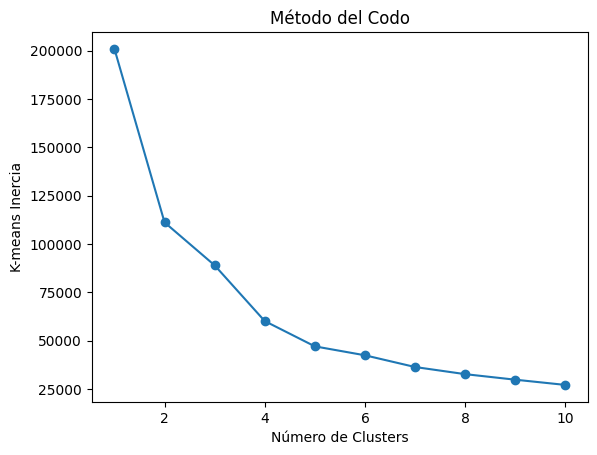

In [7]:
# Aplicar metodo de codo para conocer cuantos clusters serían adecuados
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, tol= 1e-04, random_state=42)
    km.fit(df_new)
    wcss.append(km.inertia_)

# Graficamos para observar
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('K-means Inercia')
plt

In [8]:
# Aplicación de KMeans
Kmeans = KMeans(n_clusters = 3, init='k-means++', max_iter=300, tol= 1e-04, random_state=42)
Kmeans.fit(df_scaled)


KMeans(n_clusters=3, random_state=42)

In [9]:
# Centroides y etiquetas
centroide = Kmeans.cluster_centers_
labels = Kmeans.labels_
print(centroide)

[[ 0.21268445 -0.21965734 -1.15483531 -0.00746189  0.04234143 -0.42494518
  -0.44287938]
 [ 0.02490273 -0.17386948  0.71561478 -0.04265492 -0.04657273 -0.52712268
  -0.48493352]
 [-0.25539059  0.4874136   0.1022927   0.07203378  0.02694766  1.23091273
   1.18558862]]


In [10]:
# Mostrar resultados
print(df_new.head())

   Attrition  Age  JobSatisfaction  EnvironmentSatisfaction  \
0          1   41                4                        2   
1          0   49                2                        3   
2          1   37                3                        4   
3          0   33                3                        4   
4          0   27                2                        1   

   PerformanceRating  YearsInCurrentRole  YearsAtCompany  
0                  3                   4               6  
1                  4                   7              10  
2                  3                   0               0  
3                  3                   7               8  
4                  3                   2               2  


In [11]:
# Agregar la columna 'Cluster' al DataFrame df_new con las etiquetas de los clusters
df_new['Cluster'] = Kmeans.labels_

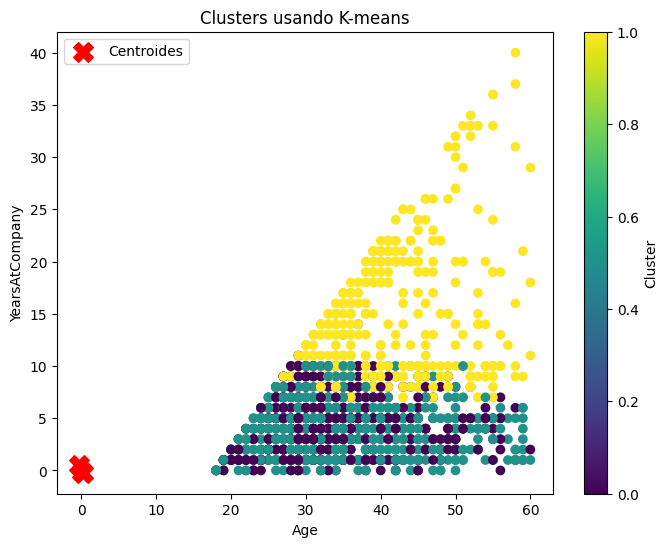

In [12]:
# Graficamos identificando los clústers elegidos y los centorides
plt.figure(figsize=(8, 6))
plt.scatter(df_new['Age'], df_new['YearsAtCompany'], c=df_new['Cluster'], cmap='viridis', marker='o')
plt.scatter(centroide[:, 0], centroide[:, 1], s=200, c='red', marker='X', label='Centroides')
plt.legend()
plt.xlabel('Age')
plt.ylabel('YearsAtCompany')
plt.title('Clusters usando K-means')
plt.colorbar(label='Cluster')
plt.show()

In [13]:
# Calcular estadísticas descriptivas por cluster
perfil_clusters = df_new.groupby('Cluster').mean()
print(perfil_clusters)

         Attrition        Age  JobSatisfaction  EnvironmentSatisfaction  \
Cluster                                                                   
0         0.239437  34.917840         1.455399                 2.713615   
1         0.170382  35.335987         3.517516                 2.675159   
2         0.067308  41.375000         2.841346                 2.800481   

         PerformanceRating  YearsInCurrentRole  YearsAtCompany  
Cluster                                                         
0                 3.169014            2.690141        4.295775  
1                 3.136943            2.320064        4.038217  
2                 3.163462            8.687500       14.269231  


In [15]:
# Comparar variables específicas entre clusters
print(df_new.groupby('Cluster')[['JobSatisfaction', 'YearsAtCompany']].mean())

         JobSatisfaction  YearsAtCompany
Cluster                                 
0               1.455399        4.295775
1               3.517516        4.038217
2               2.841346       14.269231


Interpretar los resultados

Con base en las estadísticas obtenidas, se puede describir cada cluster. Por ejemplo:

* Cluster 0: Jóvenes con alta satisfacción laboral, pero poca antigüedad.
* Cluster 1: Empleados mayores con menor satisfacción y mayor tiempo en la empresa.
* Cluster 2: Empleados con calificaciones de desempeño más altas, independientemente de la edad.

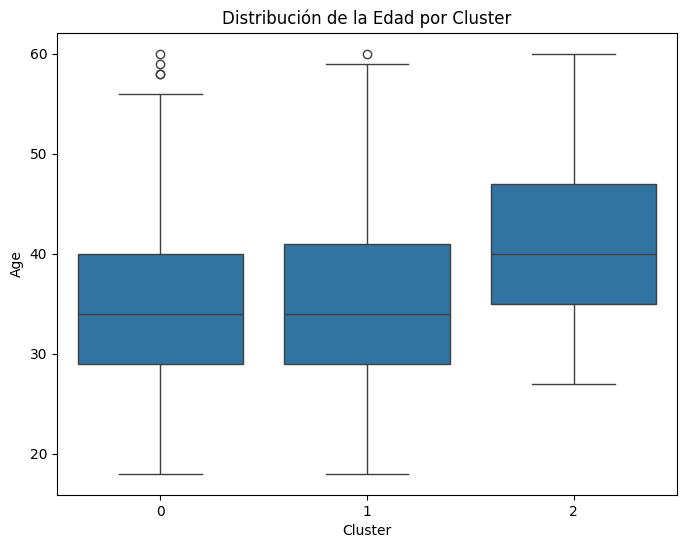

In [16]:
# Crear un boxplot para visualizar la distribución de 'Age' en cada cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Age', data=df_new)
plt.title('Distribución de la Edad por Cluster')
plt.show()